# Estimating Probabilities

Science and engineering have seen amazing progress over the last few centuries. We are now able to launch a spacecraft from Earth and predict it will arrive on Mars at a certain time and location. However, it looks like not everything is as easy to predict as the trajectory of a spacecraft.

Take **tossing a coin**, for instance — as ridiculous as it may sound, we're not able to predict with certainty whether the coin is going to land on heads or tails. And that's because a coin toss is a very complex phenomenon. The outcome depends on mutiple factors — the strength and the angle of the toss, the friction of the coin with air, the landing angle, the surface the coin lands on, etc.


Although we can't tell beforehand the outcome of a coin toss, we'll learn in this course that we're able to at least estimate the probability (the chances) of a coin landing on heads or tails. This may sound like a limitation, and in a way it is, but estimating **probabilities** is an extremely powerful technique that can enable us to build non-trivial applications, including:

- Image recognition systems (used for self-driving cars, medical diagnosis, etc.)

- Spam filters for inboxes

- Statistical hypothesis tests

Throughout this course, we'll learn:

- How to estimate probabilities theoretically and empirically.

- What are the fundamental rules of probability.

- Counting techniques — tree diagrams, the rule of product, permutations, and combinations.

Generally, for any event **E** (like a coin landing heads up), we can find its probability by using the following formula:

    P(E) = number of times event E happened / number of times we repeated the experiment
    
When we calculate the probability of an event by performing an experiment one or more times, we calculate the **experimental** — or **empirical probability** — of the event. 

Let's say we tossed a coin 300 times, and found that P(H) = 46%. Then, we tossed a coin 5,000 times and found that P(H) = 51%. But if different number of tosses give different probability values, then what's the true value of P(H)?

To answer this question, we're going to do a thought experiment where *we assume we already know that the true probability of P(H) is 50%*. We'll also assume the chances are the same for getting tails, so P(T) = 50% (P(T) is an abbreviation for P(Tails)).

Using these assumptions, we're going to use Python to simulate a coin toss 10,000 times and watch how P(H) evolves as the number of tosses increases. We begin by writing a function named coin_toss() that can simulate a single coin toss:

In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# the function I wrote which works fine
def coin_toss(loops,seed):
    import numpy as np
    np.random.seed(seed)
    p_head_list = []
    head_odd_sum = 0
    for each_loop in range(1,loops):
        head_odd = np.random.randint(0,2) # 1 = head and 0 = tail
        head_odd_sum +=head_odd
        p_head = head_odd_sum/each_loop
        p_head_list.append(p_head)
    return p_head_list
        
    
        

In [86]:
a = coin_toss(10000,seed=1)
np.mean(a)

0.49504157625238343

In [81]:
# the function provided by the class
def coin_toss():
    if np.random.randint(0,2) ==1:
        return 'HEAD'
    else:
        return 'TAIL'

In [83]:
np.random.seed(1)
probabilities = []
heads = 0

for n in range(1, 10001):
    outcome = coin_toss()
    if outcome == 'HEAD':
        heads +=1
    current_probability = heads / n
    probabilities.append(current_probability)

np.mean(probabilities)


0.4950420120947581

In [117]:
np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

(0.0, 10000.0)

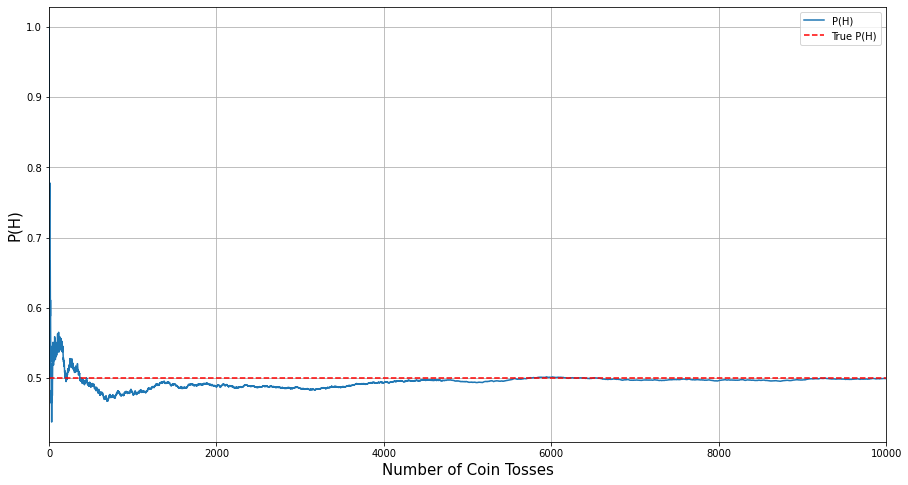

In [128]:
x = np.arange(0,10000)
fig,ax = plt.subplots(figsize=(15,8))
ax.plot( x,probabilities,label = 'P(H)')
plt.axhline(0.5,color='red',label='True P(H)',linestyle='--')
plt.legend()
plt.grid()
# ax.set(xlim=(0,10000),ylabel='P(H)',xlabel='Number of Coin Tosses',fontsize=15)
ax.set_xlabel('Number of Coin Tosses',fontsize=15)
ax.set_ylabel('P(H)',fontsize=15)
ax.set_xlim(0,10000)

Above, we see that for the first 1,000 tosses or so, the value of P(H) varies a lot, with a maximum of 1.0 and a minimum of approximately 0.45. However, as the number of tosses increases, the value of P(H) tends to stabilize.

An easier way to estimate probabilities is to start with the assumption that the outcomes of a random experiment have **equal chances of occurring**. This allows us to use the following formula to calculate the probability of an event E:

~~**P(E) = 1 / (total number of possible outcome)**~~

When we calculate the probability of an event under the assumption that the outcomes have equal chances of occurring, we say that we're calculating the **theoretical probability** of an event.

- So far, we've repeatedly used the terms **"event"** and **"outcome,"** and we need to add a few clarifications. An **outcome** is any result that a random experiment may terminate in. For instance, all the possible outcomes of rolling a six-sided die are 1, 2, 3, 4, 5, and 6. An **event**, however, has a richer meaning and can include more than one outcome (or even zero outcomes):
  
  - The event that we'll get an odd number when we roll a six-sided die — this event includes the outcomes 1, 3, and 5.
  
  - The event that we'll get a number less than 5 but greater than 1 when we roll a six-sided die — this event includes the outcomes 2, 3, and 4.
  
  - The event that we'll get a number greater than 20 when we roll a six-sided die — this event doesn't include any of the possible outcomes corresponding to rolling a six-sided die.

To fix this problem, we need to update the formula above to:

**P(E) = number of successful outcomes / total number of possible outcomes**